In [ ]:
# Importing all the required libraries used during model building and prediction.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random

In [ ]:
# Print head of the data to see how exactly the data looks like.
data = pd.read_excel(r'VesselData.xlsx')
data.head()

,eta,ata,atd,vesseldwt,vesseltype,discharge1,load1,discharge2,load2,discharge3,...,load4,stevedorenames,hasnohamis,earliesteta,latesteta,traveltype,previousportid,nextportid,isremarkable,vesselid
0,2017-09-19 00:00:00+00,2017-09-19 00:00:00+00,2017-09-22 00:00:00+00,109290.0,5,0,0,0,0,90173,...,0,Stevedore_104,NaN,2017-09-19 00:00:00+00,2017-09-19 00:00:00+00,ARRIVAL,981,731,f,2242
1,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,2017-10-03 00:00:00+00,67170.0,3,0,0,0,0,0,...,0,Stevedore_109,NaN,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,ARRIVAL,19,15,f,5462
2,2017-09-30 00:00:00+00,2017-09-30 00:00:00+00,2017-10-01 00:00:00+00,67737.0,3,0,0,0,0,0,...,0,Stevedore_57,NaN,2017-09-30 00:00:00+00,2017-09-30 00:00:00+00,ARRIVAL,19,19,f,5251
3,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,2017-10-03 00:00:00+00,43600.0,3,0,0,0,0,0,...,0,Stevedore_57,NaN,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,ARRIVAL,15,18,f,5268
4,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,9231.0,3,0,0,0,0,0,...,0,Stevedore_98,NaN,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,ARRIVAL,74,27,f,5504


In [ ]:
# Checking dimensions of data that are number of rows and number of columns
data.shape

(8208, 22)

In [ ]:
# Checking column names
data.columns

Index(['eta', 'ata', 'atd', 'vesseldwt', 'vesseltype', 'discharge1', 'load1',
       'discharge2', 'load2', 'discharge3', 'load3', 'discharge4', 'load4',
       'stevedorenames', 'hasnohamis', 'earliesteta', 'latesteta',
       'traveltype', 'previousportid', 'nextportid', 'isremarkable',
       'vesselid'],
      dtype='object')

In [ ]:
# Check if there are any null values in the dataset. We can see that, none of the column has null values.
data.isna().sum()

eta                  0
ata                  0
atd                  0
vesseldwt            2
vesseltype           0
discharge1           0
load1                0
discharge2           0
load2                0
discharge3           0
load3                0
discharge4           0
load4                0
stevedorenames       2
hasnohamis        8208
earliesteta          0
latesteta            0
traveltype           0
previousportid       0
nextportid           0
isremarkable         0
vesselid             0
dtype: int64

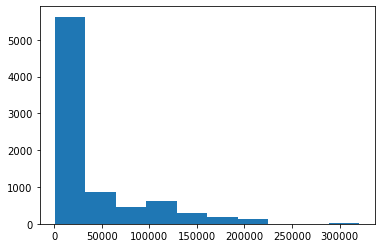

In [ ]:
# See distribution of target variable. 
plt.hist(data['vesseldwt'])
plt.show() 

In [ ]:
# Remove unnecessary column and keep only column of interest.
data = data[['vesseldwt', 'discharge1', 'discharge2', 'discharge3', 'discharge4', 'load1', 'load2', 'load3', 'load4', 'vesseltype']]

In [ ]:
data.head()

,vesseldwt,discharge1,discharge2,discharge3,discharge4,load1,load2,load3,load4,vesseltype
0,109290.0,0,0,90173,0,0,0,0,0,5
1,67170.0,0,0,0,0,0,0,0,0,3
2,67737.0,0,0,0,0,0,0,0,0,3
3,43600.0,0,0,0,0,0,0,0,0,3
4,9231.0,0,0,0,0,0,0,0,0,3


In [ ]:
# Drop null values from the datafreame.
data = data.dropna()
data.isna().sum()

vesseldwt     0
discharge1    0
discharge2    0
discharge3    0
discharge4    0
load1         0
load2         0
load3         0
load4         0
vesseltype    0
dtype: int64

In [ ]:
# Separating the target column and features.
X = data.drop(['vesseldwt'], axis = 1)
y = data['vesseldwt']

In [ ]:
# SPlit the dataset into training and testing sets, with a ratio of 70% and 30% respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
random.seed(124)
#Create Linear Regression Object and fit the model
lm = LinearRegression()
lm.fit(X_train,y_train)
lm

LinearRegression()

In [ ]:
#View coeff of Linear Regression object 
print(lm.intercept_)
print(lm.coef_)

62109.20830606992
[ 7.67144821e-01  8.35702439e-01  1.03228836e+00  9.44385951e-01
 -7.76970955e-03 -3.16350722e-01 -3.56367978e-01  4.31084601e-01
 -9.35031573e+03]


In [ ]:
#predict vesseldwt using testing data
yhat = lm.predict(X_test)

#View first five predictions -
print('First five predictions:' , yhat[0:5])

First five predictions: [30379.03257729 34058.26110574 34058.26110574 43408.57683918
 34058.26110574]


In [ ]:
#print MSE - which is mean squared error
from sklearn.metrics import mean_squared_error
print('Mean Squared Error of our prediction model', mean_squared_error(y_test, yhat))

Mean Squared Error of our prediction model 1639392172.033776


In [ ]:
# Accuracy of the baseline model using 5-cross validation method -
from sklearn.model_selection import cross_val_score
score = cross_val_score(lm, X_train, y_train, cv = 5)
print('5-Cross Validation accuracy', (np.mean(score)), (np.std(score)))

5-Cross Validation accuracy 0.3421307113522599 0.06307344003436752
